<a href="https://colab.research.google.com/github/katia-kitaguti/survival-analysis-hr-data/blob/main/202406%7CSurvival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Settings

In [ ]:
! pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 2.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=e6440e919d3856560c08aa752862a42515fb731198652c564f4cb7f834c7f4e0
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from google.colab import userdata
import os

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import AalenAdditiveFitter
from lifelines import WeibullFitter

In [ ]:
os.environ["My_Key"] = userdata.get('My_Key')
os.environ["User_Name"] = userdata.get('User_Name')

In [ ]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 2.79MB/s]


In [ ]:
! unzip "ibm-hr-analytics-attrition-dataset.zip"

Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


# 1. Base & Data Treatments

In [ ]:
df_hr = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Converting our answer column to binary (0 or 1)
df_hr['Attrition'] = df_hr['Attrition'].map({'Yes':1, 'No':0})

categorical_cols = df_hr.select_dtypes(include=['object']).columns
df_hr = pd.get_dummies(df_hr, columns=categorical_cols,drop_first=True, dtype=float)
df_hr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,0,279,8,1,1,2,3,61,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1373,2,2,1,4,4,92,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,0,1392,3,4,1,5,4,56,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,0,591,2,1,1,7,1,40,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,0,613,6,1,1,2062,4,42,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,0,155,4,3,1,2064,2,87,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,0,1023,2,3,1,2065,4,63,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EmployeeCount                      1470 non-null   int64  
 6   EmployeeNumber                     1470 non-null   int64  
 7   EnvironmentSatisfaction            1470 non-null   int64  
 8   HourlyRate                         1470 non-null   int64  
 9   JobInvolvement                     1470 non-null   int64  
 10  JobLevel                           1470 non-null   int64  
 11  JobSatisfaction                    1470 non-null   int64

# 2. Modeling

In this code below, we have only one feature predicting the event.

In our case, the event is the attrition field (leaving the company flag) and the feature is Years working at company.

<Axes: xlabel='timeline'>

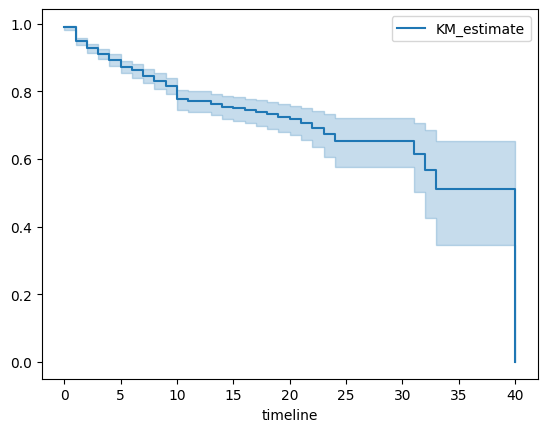

In [ ]:
event = df_hr['Attrition']
feature = df_hr['YearsAtCompany']

kmf = KaplanMeierFitter()
kmf.fit(feature, event)
kmf.plot_survival_function()

This plot shows that:
- y-axis: probability of keep working at the company
- x-axis: timeline

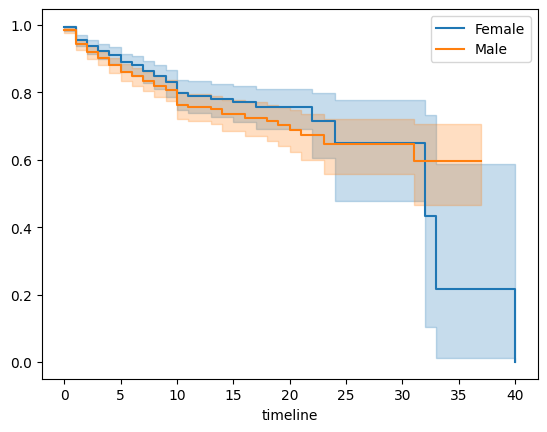

In [ ]:
# Considering gender
groups_div = df_hr['Gender_Male']
ix = (groups_div == 1)

kmf.fit(feature[~ix], event[~ix], label='Female')
ax = kmf.plot_survival_function()

kmf.fit(feature[ix], event[ix], label='Male')
ax = kmf.plot_survival_function()

Comparing these two groups:
- Women are more likely to keep working at company in the first 10 years than men.
- Situation start change after more than 20 years, when men are more likely to stay in the company than women.


# Survival Regression

In [ ]:
cols_to_consider = ["YearsAtCompany", "Attrition", "DailyRate",
    "Education","EnvironmentSatisfaction",
    "JobInvolvement","JobRole_Manager", "Gender_Male",
    "WorkLifeBalance"]

df_hr_sr = df_hr[cols_to_consider]
df_hr_sr

,YearsAtCompany,Attrition,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobRole_Manager,Gender_Male,WorkLifeBalance
0,6,1,1102,2,2,3,0.0,0.0,1
1,10,0,279,1,3,2,0.0,1.0,3
2,0,1,1373,2,4,2,0.0,1.0,3
3,8,0,1392,4,4,3,0.0,0.0,3
4,2,0,591,1,1,3,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...
1465,5,0,884,2,3,4,0.0,1.0,3
1466,7,0,613,1,4,2,0.0,1.0,3
1467,6,0,155,3,2,4,0.0,1.0,3
1468,9,0,1023,3,4,2,0.0,1.0,2


In [ ]:
# Fitting the Cox Proportional Hazards model to the data
cph = CoxPHFitter()
cph.fit(df_hr_sr,
        duration_col='YearsAtCompany',
        event_col= 'Attrition')

#Making predictions with the model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1533.14
         time fit was run = 2024-06-22 01:27:07 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
DailyRate                -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Education                -0.11       0.90       0.06            -0.23             0.01                 0.79                 1.01
EnvironmentSatisfaction  -0.25       0.78       0.06            -0.36            -0.13                 0.70                 0.88
JobInvolvement           -0.38       0.68       0.09            -0.55            -0.21                 0.58                 0.81
JobRole_Manager          -1.97       0.14       0.46            -2.88            -1.06                 0.06                 0.35
Gender_Male               0.21       1.24       0.14            -0.05             0.48                 0.95                 1.61
WorkLifeBalance          -0.20       0.82       0.09            -0.38            -0.02                 0.68                 0.98

                          cmp to     z      p   -log2(p)
covariate                                               
DailyRate                   0.00 -1.67   0.10       3.39
Education                   0.00 -1.78   0.07       3.74
EnvironmentSatisfaction     0.00 -4.15 <0.005      14.86
JobInvolvement              0.00 -4.45 <0.005      16.85
JobRole_Manager             0.00 -4.26 <0.005      15.58
Gender_Male                 0.00  1.56   0.12       3.08
WorkLifeBalance             0.00 -2.23   0.03       5.27
---
Concordance = 0.66
Partial AIC = 3080.29
log-likelihood ratio test = 81.96 on 7 df
-log2(p) of ll-ratio test = 47.37

<Axes: xlabel='log(HR) (95% CI)'>

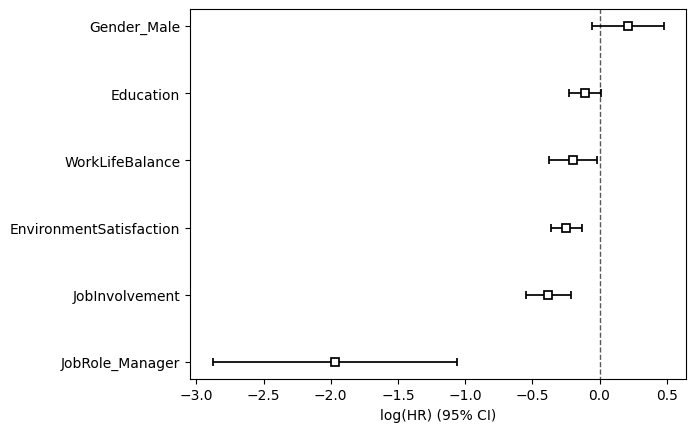

In [ ]:
cph.plot()

Explanation regarding the metrics generated through summary:



*   coef: The positive coeficient indicates that the hazard will be increasing. The negative coeficient shows that hazard will be decreasing. Shows if the coeficient is statistically significant.
*   exp(coef): This value represents the change in the hazard for a one-unit increase the predictor value. The value greater than 1 indicates an increased hazard, and value less than 1 indicates a decreased hazard
- se(coef): The standard error of the coefficient.
- coef lower 95% and coef upper 95%: the lower and upper bounds of the 95% confidence interval for the coefficient
- exp(coef) lower 95% and exp(coef) upper 95%: The lower and upper bounds of the 95% confidence interval for the hazard ratio.
- cmp to: The comparison value, which is usually 0, indicating that the null hypothesis is that the coefficient is zero.
- z: The z-score for the hypothesis test, which measures how many standard errors the coefficient is away from zero.
- p: The p-value for the hypothesis test. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
- -log2(p): The negative base-2 logarithm of the p-value, often used to make very small p-values more interpretable




Through the results:
- DailyRate : doesn't affect the hazard of the event occurring
- Education: higher education slightly reduces the hazard, but it is not statistically signficant
- EnvironmentSatisfaction: the higher satisfaction reduces the hazard, and this is statistically significant. Individuals with high satisfaction have 22% lower hazard
- JobInvolvement: the higher job involvement reduced the hazard, and it is statistically significant. Individuals with high job involvement have 32% lower hazard.
- JobRole_Manager: Being a manager reduces the hazard. Managers have 86% lower hazard compared to non-managers
- Gender_Male: This is not statistically significant
- WorkLifeBalance: Individuals with work life balance have 18% lower hazard.



In [ ]:
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(df_hr_sr, 'YearsAtCompany', 'Attrition')
aaf.print_summary()

<lifelines.AalenAdditiveFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
       number of subjects = 1470
number of events observed = 237
         time fit was run = 2024-06-22 01:26:46 UTC

---
Empty DataFrame
Columns: []
Index: [Education, EnvironmentSatisfaction, JobInvolvement, JobRole_Manager, Gender_Male, WorkLifeBalance]
---
Concordance = 0.49

<Axes: >

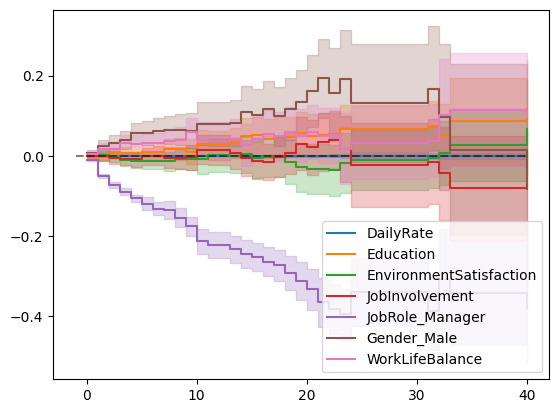

In [ ]:
aaf.plot()

According to the AalenAdditiveFitter:
- slope(coef): Positive slope indicates that hazard increases. Negative slope indicates that hazard decreases
- se(slope(coef)): The standard error of the slope coefficients.
- Concordance: a measure that indicates how well the model predicts the observed data.

So, according to the concordance value, the model is not predicting well.

In [ ]:
observed_data = df_hr_sr.iloc[0]
observed_data

YearsAtCompany                6.0
Attrition                     1.0
DailyRate                  1102.0
Education                     2.0
EnvironmentSatisfaction       2.0
JobInvolvement                3.0
JobRole_Manager               0.0
Gender_Male                   0.0
WorkLifeBalance               1.0
Name: 0, dtype: float64

<Axes: >

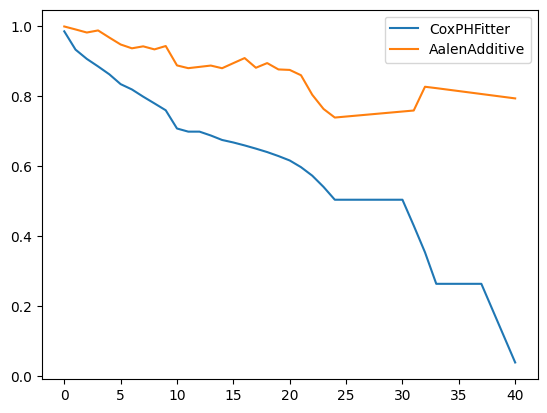

In [ ]:
observed_data = df_hr_sr.iloc[0]

ax = cph.predict_survival_function(observed_data).rename(columns={0:'CoxPHFitter'}).plot()
aaf.predict_survival_function(observed_data).rename(columns={0:'AalenAdditive'}).plot(ax=ax)

In [ ]:
df_hr_sr_copy = df_hr_sr.copy()
df_hr_sr_copy['YearsAtCompany'] = df_hr_sr_copy['YearsAtCompany'].apply(lambda x: x if x > 0 else 0.001)
wbf = WeibullFitter()
wbf.fit(df_hr_sr_copy['YearsAtCompany'], df_hr_sr_copy['Attrition'])
print(wbf.summary)

              coef   se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  84.186198  13.572087       57.585395      110.787000     1.0   
rho_      0.704079   0.040143        0.625401        0.782757     1.0   

                z             p   -log2(p)  
lambda_  6.129212  8.831551e-10  30.076614  
rho_    -7.371722  1.684377e-13  42.432850  


<Axes: >

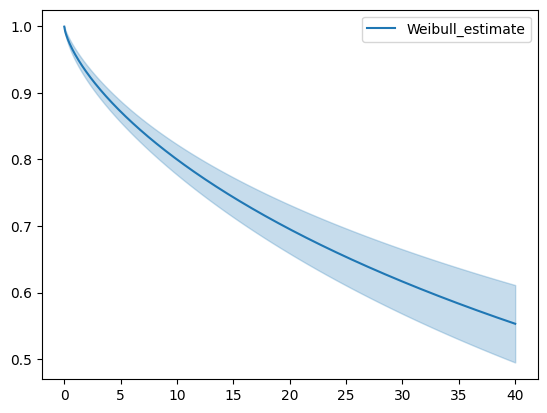

In [ ]:
wbf.plot_survival_function()

# Survival Regression Improvement

In [ ]:
cols_to_consider_imp = ["YearsAtCompany", "Attrition", "DailyRate",
    "Education","EnvironmentSatisfaction",
    "JobInvolvement","JobRole_Manager", "Gender_Male","WorkLifeBalance",
    "DistanceFromHome", "NumCompaniesWorked", "StockOptionLevel",
    "YearsSinceLastPromotion", "MonthlyIncome",
]

df_hr_sr_imp = df_hr[cols_to_consider_imp]
df_hr_sr_imp

,YearsAtCompany,Attrition,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobRole_Manager,Gender_Male,WorkLifeBalance,DistanceFromHome,NumCompaniesWorked,StockOptionLevel,YearsSinceLastPromotion,MonthlyIncome
0,6,1,1102,2,2,3,0.0,0.0,1,1,8,0,0,5993
1,10,0,279,1,3,2,0.0,1.0,3,8,1,1,1,5130
2,0,1,1373,2,4,2,0.0,1.0,3,2,6,0,0,2090
3,8,0,1392,4,4,3,0.0,0.0,3,3,1,0,3,2909
4,2,0,591,1,1,3,0.0,1.0,3,2,9,1,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,5,0,884,2,3,4,0.0,1.0,3,23,4,1,0,2571
1466,7,0,613,1,4,2,0.0,1.0,3,6,4,1,1,9991
1467,6,0,155,3,2,4,0.0,1.0,3,4,1,1,0,6142
1468,9,0,1023,3,4,2,0.0,1.0,2,2,2,0,0,5390


In [ ]:
# Fitting the Cox Proportional Hazards model to the data
cph_imp = CoxPHFitter()
cph_imp.fit(df_hr_sr_imp,
        duration_col='YearsAtCompany',
        event_col= 'Attrition')

#Making predictions with the model
cph_imp.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1438.78
         time fit was run = 2024-06-22 01:39:10 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
DailyRate                -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Education                -0.10       0.91       0.06            -0.22             0.03                 0.80                 1.03
EnvironmentSatisfaction  -0.20       0.82       0.06            -0.32            -0.08                 0.73                 0.92
JobInvolvement           -0.46       0.63       0.09            -0.63            -0.29                 0.53                 0.75
JobRole_Manager           0.44       1.56       0.58            -0.69             1.57                 0.50                 4.81
Gender_Male               0.19       1.21       0.14            -0.08             0.46                 0.93                 1.58
WorkLifeBalance          -0.11       0.90       0.09            -0.28             0.07                 0.76                 1.07
DistanceFromHome          0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
NumCompaniesWorked        0.13       1.14       0.02             0.08             0.18                 1.09                 1.20
StockOptionLevel         -0.50       0.61       0.09            -0.68            -0.32                 0.51                 0.73
YearsSinceLastPromotion  -0.09       0.91       0.03            -0.14            -0.04                 0.87                 0.96
MonthlyIncome            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                          cmp to     z      p   -log2(p)
covariate                                               
DailyRate                   0.00 -1.09   0.28       1.86
Education                   0.00 -1.52   0.13       2.96
EnvironmentSatisfaction     0.00 -3.37 <0.005      10.40
JobInvolvement              0.00 -5.31 <0.005      23.10
JobRole_Manager             0.00  0.77   0.44       1.18
Gender_Male                 0.00  1.39   0.16       2.61
WorkLifeBalance             0.00 -1.21   0.23       2.14
DistanceFromHome            0.00  3.13 <0.005       9.16
NumCompaniesWorked          0.00  5.39 <0.005      23.77
StockOptionLevel            0.00 -5.42 <0.005      24.03
YearsSinceLastPromotion     0.00 -3.59 <0.005      11.56
MonthlyIncome               0.00 -8.43 <0.005      54.66
---
Concordance = 0.81
Partial AIC = 2901.56
log-likelihood ratio test = 270.68 on 12 df
-log2(p) of ll-ratio test = 166.71

Adding the columns:

- "DistanceFromHome",
- NumCompaniesWorked",
- "StockOptionLevel",
- "YearsSinceLastPromotion",
- "MonthlyIncome",

Increased the Concordance metric 0.66 to 0.81, which means that the distance from home, individuals` previous experiences, perks, level of education, his(er) satisfaction with job can really change the way this individual deals with work.


# References

https://medium.com/gitconnected/survival-analysis-in-python-a-step-by-step-guide-for-churn-prediction-98cd509cebfd
